In [17]:
import pandas as pd
import numpy as np


In [18]:
df = pd.read_csv(
    r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv",
    encoding="latin1"
)


In [19]:
df.head()


,Organisation,Unnamed: 1,Country,Region,Main Facility Address,Secondary Facility,Core Function,Main Activities,Commercial/Sclaed,Piloting,...,Current Capacity,2025 Capacity,2030 Capacity,Feedstock,Output type,Output composition,Certification,Original source,Date last updated,Unnamed: 21
0,All - Tex Recyclers Ltd,NaN,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,...,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
1,Antur Waunfawr/ Warws Werdd,NaN,Germany,Europe,"11 Circular Way, City 2",NaN,Reuse & resale,Bring-bank collection and sorting,Yes,No,...,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global Recycled Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
2,ARETEX,NaN,France,Europe,"12 Circular Way, City 3",NaN,Mechanical recycling,Sorting by fibre composition and colour,Yes,No,...,530,636,795,Post-consumer polyester garments,Industrial wiping cloths,Mixed natural and synthetic fibres,RCS (Recycled Claim Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
3,Around Systems,NaN,Netherlands,Europe,"13 Circular Way, City 4",NaN,Chemical recycling,Export of reusable clothing,Yes,No,...,545,654,817,Pre-consumer production offcuts,Insulation material,High-grade cotton wiping rags,ISO 9001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
4,Atelier Riforma,NaN,Belgium,Europe,"14 Circular Way, City 5","Satellite Facility 5, Industrial Zone",Collection & logistics,Shredding and fibre recovery,Yes,No,...,560,672,840,Hotel and hospital linens,Polymer flakes,PET flakes suitable for spinning,NaN,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN


In [20]:
df_raw = df.copy()


In [21]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Organisation           80 non-null     object 
 1   Unnamed: 1             0 non-null      float64
 2   Country                80 non-null     object 
 3   Region                 80 non-null     object 
 4   Main Facility Address  80 non-null     object 
 5   Secondary Facility     20 non-null     object 
 6   Core Function          80 non-null     object 
 7   Main Activities        80 non-null     object 
 8   Commercial/Sclaed      80 non-null     object 
 9   Piloting               80 non-null     object 
 10  Research\Lab           80 non-null     object 
 11  Intereseted In         80 non-null     object 
 12  Current Capacity       80 non-null     int64  
 13  2025 Capacity          80 non-null     int64  
 14  2030 Capacity          80 non-null     int64  
 15  Feedstoc

In [22]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w]", "", regex=True)
)

df.columns


Index(['organisation', 'unnamed_1', 'country', 'region',
       'main_facility_address', 'secondary_facility', 'core_function',
       'main_activities', 'commercialsclaed', 'piloting', 'researchlab',
       'intereseted_in', 'current_capacity', '2025_capacity', '2030_capacity',
       'feedstock', 'output_type', 'output_composition', 'certification',
       'original_source', 'date_last_updated', 'unnamed_21'],
      dtype='object')

In [23]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

before, after


(80, 80)

In [24]:
missing = df.isna().sum().sort_values(ascending=False)
missing


unnamed_21               80
unnamed_1                80
secondary_facility       60
certification            16
current_capacity          0
date_last_updated         0
original_source           0
output_composition        0
output_type               0
feedstock                 0
2030_capacity             0
2025_capacity             0
organisation              0
researchlab               0
piloting                  0
commercialsclaed          0
main_activities           0
core_function             0
main_facility_address     0
region                    0
country                   0
intereseted_in            0
dtype: int64

In [25]:
numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = df.select_dtypes(exclude="number").columns.tolist()

numeric_cols, categorical_cols


(['unnamed_1',
  'current_capacity',
  '2025_capacity',
  '2030_capacity',
  'unnamed_21'],
 ['organisation',
  'country',
  'region',
  'main_facility_address',
  'secondary_facility',
  'core_function',
  'main_activities',
  'commercialsclaed',
  'piloting',
  'researchlab',
  'intereseted_in',
  'feedstock',
  'output_type',
  'output_composition',
  'certification',
  'original_source',
  'date_last_updated'])

In [26]:
critical_numeric = [
    "weight_kg",
    "recovery_outcome",
    "processing_efficiency"
]

critical_numeric = [c for c in critical_numeric if c in df.columns]

df = df.dropna(subset=critical_numeric)


In [27]:
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())


In [28]:
for col in categorical_cols:
    df[col] = df[col].fillna("unknown")


In [29]:
date_cols = ["processing_date", "collection_date"]

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")


In [30]:
if "weight_kg" in df.columns:
    df = df[df["weight_kg"] > 0]

if "processing_efficiency" in df.columns:
    df = df[(df["processing_efficiency"] >= 0) & (df["processing_efficiency"] <= 1)]


In [31]:
text_cols = [
    "fibre_composition",
    "sorting_method",
    "recycling_method",
    "collection_method"
]

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()


In [32]:
df["recovery_rate_pct"] = df["recovery_outcome"] / df["weight_kg"]


KeyError: 'recovery_outcome'

In [46]:
list(df.columns)


['organisation',
 'unnamed_1',
 'country',
 'region',
 'main_facility_address',
 'secondary_facility',
 'core_function',
 'main_activities',
 'commercialsclaed',
 'piloting',
 'researchlab',
 'intereseted_in',
 'current_capacity',
 '2025_capacity',
 '2030_capacity',
 'feedstock',
 'output_type',
 'output_composition',
 'certification',
 'original_source',
 'date_last_updated',
 'unnamed_21']

In [48]:
[c for c in df.columns if "recover" in c.lower()]


[]

In [50]:
path = r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv"

with open(path, "rb") as f:
    raw = f.read(2000)

raw[:200]  # shows raw bytes


b'Organisation,,Country,Region,Main Facility Address,Secondary Facility,Core Function,Main Activities,Commercial/Sclaed,Piloting,Research\\Lab,Intereseted In,Current Capacity,2025 Capacity,2030 Capacity,'

In [52]:
for enc in ["utf-8", "utf-8-sig", "cp1252", "latin1", "utf-16"]:
    try:
        with open(path, "r", encoding=enc, errors="strict") as f:
            lines = [next(f) for _ in range(10)]
        print("\n=== encoding:", enc, "===\n")
        print("".join(lines))
        break
    except Exception as e:
        continue



=== encoding: latin1 ===

Organisation,,Country,Region,Main Facility Address,Secondary Facility,Core Function,Main Activities,Commercial/Sclaed,Piloting,Research\Lab,Intereseted In,Current Capacity,2025 Capacity,2030 Capacity,Feedstock,Output type,Output composition,Certification,Original source,Date last updated,
All - Tex Recyclers Ltd,,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,No,Textile-to-textile recycling; circular business models,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not actual WRAP records),2025-12-25,
Antur Waunfawr/ Warws Werdd,,Germany,Europe,"11 Circular Way, City 2",,Reuse & resale,Bring-bank collection and sorting,Yes,No,No,Textile-to-textile recycling; circular business models,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global

In [54]:
import pandas as pd

path = r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv"

def load_csv_safely(path):
    encodings = ["utf-8-sig", "utf-8", "cp1252", "latin1", "utf-16"]
    seps = [None, ",", ";", "\t", "|"]  # None = infer (python engine)
    
    last_err = None
    for enc in encodings:
        for sep in seps:
            try:
                df_try = pd.read_csv(
                    path,
                    encoding=enc,
                    sep=sep,
                    engine="python",
                    on_bad_lines="skip"
                )
                # success criteria: has at least 2 columns OR at least 1 row
                if df_try.shape[1] > 1 or df_try.shape[0] > 0:
                    print("Loaded with encoding =", enc, "| sep =", repr(sep), "| shape =", df_try.shape)
                    return df_try
            except Exception as e:
                last_err = e
                continue
    raise last_err

df = load_csv_safely(path)
df.head()


Loaded with encoding = latin1 | sep = None | shape = (80, 22)


,Organisation,Unnamed: 1,Country,Region,Main Facility Address,Secondary Facility,Core Function,Main Activities,Commercial/Sclaed,Piloting,...,Current Capacity,2025 Capacity,2030 Capacity,Feedstock,Output type,Output composition,Certification,Original source,Date last updated,Unnamed: 21
0,All - Tex Recyclers Ltd,NaN,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,...,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
1,Antur Waunfawr/ Warws Werdd,NaN,Germany,Europe,"11 Circular Way, City 2",NaN,Reuse & resale,Bring-bank collection and sorting,Yes,No,...,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global Recycled Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
2,ARETEX,NaN,France,Europe,"12 Circular Way, City 3",NaN,Mechanical recycling,Sorting by fibre composition and colour,Yes,No,...,530,636,795,Post-consumer polyester garments,Industrial wiping cloths,Mixed natural and synthetic fibres,RCS (Recycled Claim Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
3,Around Systems,NaN,Netherlands,Europe,"13 Circular Way, City 4",NaN,Chemical recycling,Export of reusable clothing,Yes,No,...,545,654,817,Pre-consumer production offcuts,Insulation material,High-grade cotton wiping rags,ISO 9001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
4,Atelier Riforma,NaN,Belgium,Europe,"14 Circular Way, City 5","Satellite Facility 5, Industrial Zone",Collection & logistics,Shredding and fibre recovery,Yes,No,...,560,672,840,Hotel and hospital linens,Polymer flakes,PET flakes suitable for spinning,NaN,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN


In [56]:
df.shape
list(df.columns)[:50]
df.head(3)


,Organisation,Unnamed: 1,Country,Region,Main Facility Address,Secondary Facility,Core Function,Main Activities,Commercial/Sclaed,Piloting,...,Current Capacity,2025 Capacity,2030 Capacity,Feedstock,Output type,Output composition,Certification,Original source,Date last updated,Unnamed: 21
0,All - Tex Recyclers Ltd,NaN,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,...,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
1,Antur Waunfawr/ Warws Werdd,NaN,Germany,Europe,"11 Circular Way, City 2",NaN,Reuse & resale,Bring-bank collection and sorting,Yes,No,...,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global Recycled Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
2,ARETEX,NaN,France,Europe,"12 Circular Way, City 3",NaN,Mechanical recycling,Sorting by fibre composition and colour,Yes,No,...,530,636,795,Post-consumer polyester garments,Industrial wiping cloths,Mixed natural and synthetic fibres,RCS (Recycled Claim Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN


In [58]:
# Check what delimiter is inside the first column
col0 = df.columns[0]
df[col0].astype(str).head(5)


0        All - Tex Recyclers Ltd
1    Antur Waunfawr/ Warws Werdd
2                         ARETEX
3                 Around Systems
4                Atelier Riforma
Name: Organisation, dtype: object

In [60]:
[c for c in df.columns if "recover" in c.lower()]


[]

In [62]:
[c for c in df.columns if "output" in c.lower() or "yield" in c.lower()]


['Output type', 'Output composition']

In [64]:
import pandas as pd
import numpy as np

df_class = pd.read_csv(
    r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv",
    encoding="latin1"
)

df_class.columns = (
    df_class.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df_class.head()


,organisation,unnamed:_1,country,region,main_facility_address,secondary_facility,core_function,main_activities,commercial/sclaed,piloting,...,current_capacity,2025_capacity,2030_capacity,feedstock,output_type,output_composition,certification,original_source,date_last_updated,unnamed:_21
0,All - Tex Recyclers Ltd,NaN,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,...,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
1,Antur Waunfawr/ Warws Werdd,NaN,Germany,Europe,"11 Circular Way, City 2",NaN,Reuse & resale,Bring-bank collection and sorting,Yes,No,...,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global Recycled Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
2,ARETEX,NaN,France,Europe,"12 Circular Way, City 3",NaN,Mechanical recycling,Sorting by fibre composition and colour,Yes,No,...,530,636,795,Post-consumer polyester garments,Industrial wiping cloths,Mixed natural and synthetic fibres,RCS (Recycled Claim Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
3,Around Systems,NaN,Netherlands,Europe,"13 Circular Way, City 4",NaN,Chemical recycling,Export of reusable clothing,Yes,No,...,545,654,817,Pre-consumer production offcuts,Insulation material,High-grade cotton wiping rags,ISO 9001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
4,Atelier Riforma,NaN,Belgium,Europe,"14 Circular Way, City 5","Satellite Facility 5, Industrial Zone",Collection & logistics,Shredding and fibre recovery,Yes,No,...,560,672,840,Hotel and hospital linens,Polymer flakes,PET flakes suitable for spinning,NaN,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN


In [68]:
np.random.seed(42)

n = 300  # number of synthetic batches

df = pd.DataFrame({
    "batch_id": range(1, n + 1),
    "output_type": np.random.choice(df_class["output_type"], n),
    "output_composition": np.random.choice(df_class["output_composition"], n),

    # WRAP-consistent operational variables
    "weight_kg": np.random.uniform(50, 2000, n),              # typical batch sizes
    "sorting_method": np.random.choice(
        ["manual", "semi-automated", "automated"], n, p=[0.45, 0.35, 0.20]
    ),
    "recycling_method": np.random.choice(
        ["mechanical", "chemical", "reuse"], n, p=[0.55, 0.20, 0.25]
    ),
    "transport_distance_km": np.random.uniform(5, 180, n),
    "processing_cost_gbp": np.random.uniform(0.15, 1.20, n),
})


In [70]:
efficiency_map = {
    "reuse": np.random.uniform(0.65, 0.90, n),
    "mechanical": np.random.uniform(0.40, 0.75, n),
    "chemical": np.random.uniform(0.55, 0.85, n),
}

df["processing_efficiency"] = df["recycling_method"].map(
    lambda m: np.random.uniform(
        0.65, 0.9) if m == "reuse"
        else np.random.uniform(0.4, 0.75) if m == "mechanical"
        else np.random.uniform(0.55, 0.85)
)


In [72]:
df["recovered_weight_kg"] = df["weight_kg"] * df["processing_efficiency"]


In [74]:
df["recovery_rate_pct"] = df["recovered_weight_kg"] / df["weight_kg"]
df["landfill_diversion_rate"] = 1 - df["recovery_rate_pct"]
df["total_processing_cost"] = df["weight_kg"] * df["processing_cost_gbp"]


In [76]:
df.head()
df.describe()


,batch_id,weight_kg,transport_distance_km,processing_cost_gbp,processing_efficiency,recovered_weight_kg,recovery_rate_pct,landfill_diversion_rate,total_processing_cost
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1007.261677,94.049751,0.668184,0.656458,658.514392,0.656458,0.343542,686.920185
std,86.746758,557.766372,50.037220,0.302843,0.122261,387.765265,0.122261,0.122261,524.774406
min,1.000000,78.362098,5.864497,0.153379,0.400516,44.709143,0.400516,0.107331,21.102984
25%,75.750000,516.861028,49.926546,0.402330,0.568511,316.901646,0.568511,0.259079,261.322871
50%,150.500000,1002.223296,96.535619,0.681297,0.667215,644.850464,0.667215,0.332785,561.478671
75%,225.250000,1504.597313,134.021832,0.924325,0.740921,942.654500,0.740921,0.431489,998.730461
max,300.000000,1999.449463,179.897402,1.198265,0.892669,1658.276748,0.892669,0.599484,2336.377084


In [80]:
df.to_csv(
    r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed\wrap_operational_model_data.csv",
    index=False
)


In [82]:
import os

os.makedirs(
    r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed",
    exist_ok=True
)


In [84]:
df.to_csv(
    r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed\wrap_operational_model_data.csv",
    index=False
)


In [86]:
import os

os.listdir(r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed")


['wrap_operational_model_data.csv']

In [88]:
import pandas as pd
import numpy as np

path = r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed\wrap_operational_model_data.csv"
df = pd.read_csv(path)

df.shape, df.columns.tolist()[:25]


((300, 13),
 ['batch_id',
  'output_type',
  'output_composition',
  'weight_kg',
  'sorting_method',
  'recycling_method',
  'transport_distance_km',
  'processing_cost_gbp',
  'processing_efficiency',
  'recovered_weight_kg',
  'recovery_rate_pct',
  'landfill_diversion_rate',
  'total_processing_cost'])

In [90]:
df.head(3)


,batch_id,output_type,output_composition,weight_kg,sorting_method,recycling_method,transport_distance_km,processing_cost_gbp,processing_efficiency,recovered_weight_kg,recovery_rate_pct,landfill_diversion_rate,total_processing_cost
0,1,Industrial wiping cloths,Blended fibre bales for downcycling,739.036845,automated,mechanical,150.054589,0.221581,0.706559,522.173192,0.706559,0.293441,163.756468
1,2,Reused clothing,Mixed natural and synthetic fibres,1188.129418,automated,mechanical,80.405317,0.177103,0.588683,699.431701,0.588683,0.411317,210.420693
2,3,Recycled fibre,100% recycled polyester fibre,201.582542,semi-automated,mechanical,48.524998,0.291925,0.498865,100.562545,0.498865,0.501135,58.846904


In [92]:
df.isna().sum().sort_values(ascending=False).head(15)
df.describe(include="all").T.head(25)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
batch_id,300.0,NaN,NaN,NaN,150.5,86.746758,1.0,75.75,150.5,225.25,300.0
output_type,300,7,Recycled fibre,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
output_composition,300,6,Mixed natural and synthetic fibres,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight_kg,300.0,NaN,NaN,NaN,1007.261677,557.766372,78.362098,516.861028,1002.223296,1504.597313,1999.449463
sorting_method,300,3,manual,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recycling_method,300,3,mechanical,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transport_distance_km,300.0,NaN,NaN,NaN,94.049751,50.03722,5.864497,49.926546,96.535619,134.021832,179.897402
processing_cost_gbp,300.0,NaN,NaN,NaN,0.668184,0.302843,0.153379,0.40233,0.681297,0.924325,1.198265
processing_efficiency,300.0,NaN,NaN,NaN,0.656458,0.122261,0.400516,0.568511,0.667215,0.740921,0.892669
recovered_weight_kg,300.0,NaN,NaN,NaN,658.514392,387.765265,44.709143,316.901646,644.850464,942.6545,1658.276748


In [94]:
import pandas as pd
import numpy as np

path = r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed\wrap_operational_model_data.csv"
df = pd.read_csv(path)

df.shape, df.columns.tolist()[:20]


((300, 13),
 ['batch_id',
  'output_type',
  'output_composition',
  'weight_kg',
  'sorting_method',
  'recycling_method',
  'transport_distance_km',
  'processing_cost_gbp',
  'processing_efficiency',
  'recovered_weight_kg',
  'recovery_rate_pct',
  'landfill_diversion_rate',
  'total_processing_cost'])

In [96]:
np.random.seed(42)

total_input = df["weight_kg"].sum()

# Sorting centres: split total capacity across 3 centres with some imbalance (realistic)
sorting_centres = ["S1", "S2", "S3"]
sorting_capacity = {
    "S1": 0.40 * total_input,
    "S2": 0.35 * total_input,
    "S3": 0.25 * total_input
}

# Recycling facilities by method (3 each)
methods = sorted(df["recycling_method"].unique().tolist())

recyclers = {}
recycler_capacity = {}

for m in methods:
    facs = [f"{m[:1].upper()}{i}" for i in range(1, 4)]  # e.g., Mechanical -> M1,M2,M3
    recyclers[m] = facs
    
    # method capacity based on historical share in the dataset
    method_share = df.loc[df["recycling_method"] == m, "weight_kg"].sum() / total_input
    method_total_cap = method_share * total_input  # base capacity ~ observed load
    
    # split across the three facilities unevenly
    splits = np.random.dirichlet([2, 2, 2], 1).flatten()
    for f, s in zip(facs, splits):
        recycler_capacity[f] = s * method_total_cap

sorting_capacity, recycler_capacity


({'S1': 120871.40124827198, 'S2': 105762.47609223796, 'S3': 75544.62578016998},
 {'C1': 28370.887933156246,
  'C2': 17713.020198296996,
  'C3': 16383.402401343395,
  'M1': 24757.642602652457,
  'M2': 83278.43200032832,
  'M3': 51343.97056565481,
  'R1': 16225.56840894718,
  'R2': 35430.04428906395,
  'R3': 28675.534721236585})

In [98]:
# Assign each batch to a sorting centre (probabilities reflect capacity share)
sc_probs = np.array([sorting_capacity[s] for s in sorting_centres]) / sum(sorting_capacity.values())
df["sorting_centre"] = np.random.choice(sorting_centres, size=len(df), p=sc_probs)

# Assign each batch to a recycler facility based on recycling_method
df["recycler_facility"] = df["recycling_method"].apply(lambda m: np.random.choice(recyclers[m]))

df[["batch_id","weight_kg","sorting_centre","recycling_method","recycler_facility"]].head()


,batch_id,weight_kg,sorting_centre,recycling_method,recycler_facility
0,1,739.036845,S1,mechanical,M2
1,2,1188.129418,S2,mechanical,M2
2,3,201.582542,S1,mechanical,M2
3,4,1950.069875,S1,reuse,R1
4,5,1973.110952,S1,mechanical,M1


In [100]:
import networkx as nx

# Transport cost rate (GBP per kg per km) - simple assumption
transport_cost_rate = 0.002  # £0.002 per kg per km (tunable)

# Base processing cost per kg by method from your dataset
proc_cost_per_kg_method = df.groupby("recycling_method")["processing_cost_gbp"].mean().to_dict()

# Create coordinates (synthetic) to derive distances, OR just random distances (we'll do random but consistent)
np.random.seed(7)

# Distances collection -> sorting
dist_cs = {s: np.random.uniform(5, 60) for s in sorting_centres}  # km

# Distances sorting -> recycler facility
dist_sr = {}
for s in sorting_centres:
    for m in methods:
        for r in recyclers[m]:
            dist_sr[(s, r)] = np.random.uniform(10, 180)  # km

dist_cs, list(dist_sr.items())[:3]


({'S1': 9.196955915567646, 'S2': 47.89553357320631, 'S3': 29.112507729249142},
 [(('S1', 'C1'), 132.98908023126),
  (('S1', 'C2'), 176.25821703942245),
  (('S1', 'C3'), 101.54429796977372)])

In [142]:
G = nx.DiGraph()

source = "COLLECTION"
sink = "END"

G.add_node(source, demand=0)
G.add_node(sink, demand=0)

# Add nodes
for s in sorting_centres:
    G.add_node(s, demand=0)

for m in methods:
    for r in recyclers[m]:
        G.add_node(r, demand=0)

# Total demand (scale to keep it computationally nice)
scale = 10  # 1 unit flow = 10 kg
demand_units = int(round(total_input / scale))

G.nodes[source]["demand"] = -demand_units
G.nodes[sink]["demand"] = demand_units

# Edge: Collection -> Sorting
for s in sorting_centres:
    cap_units = int(round(sorting_capacity[s] / scale))
    cost_per_unit = dist_cs[s] * transport_cost_rate * scale  # convert to cost per "unit" (scale kg)
    G.add_edge(source, s, capacity=cap_units, weight=float(cost_per_unit))

# Edge: Sorting -> Recycler (transport + processing)
for s in sorting_centres:
    for m in methods:
        for r in recyclers[m]:
            cap_units = int(round(recycler_capacity[r] / scale))
            transport_cost = dist_sr[(s, r)] * transport_cost_rate * scale
            processing_cost = proc_cost_per_kg_method[m] * scale
            G.add_edge(s, r, capacity=cap_units, weight=float(transport_cost + processing_cost))

# Edge: Recycler -> End (no cost, huge capacity)
big_cap = int(1e12)
for m in methods:
    for r in recyclers[m]:
        G.add_edge(r, sink, capacity=big_cap, weight=0.0)

# Solve min-cost flow
flow = nx.min_cost_flow(G)
total_cost = nx.cost_of_flow(G, flow)

total_cost


KeyboardInterrupt: 

In [136]:
G.number_of_nodes(), G.number_of_edges()


(14, 39)

In [138]:
total_input, demand_units


(302178.50312067993, 30218)

In [140]:
sum(int(round(sorting_capacity[s]/scale)) for s in sorting_centres), demand_units


(30217, 30218)

In [ ]:
sum(int(round(recycler_capacity[r]/scale)) for m in methods for r in recyclers[m]), demand_units


In [147]:
scale = 100  # 1 unit = 100 kg
demand_units = int(round(total_input / scale))

G.nodes[source]["demand"] = -demand_units
G.nodes[sink]["demand"] = demand_units


In [149]:
# keep only 1 recycler per method (for speed)
recyclers_small = {m: [recyclers[m][0]] for m in methods}


In [151]:
print("nodes, edges:", G.number_of_nodes(), G.number_of_edges())
print("total_input kg:", total_input)
print("scale:", scale, "demand_units:", demand_units)

sort_cap_units = sum(int(round(sorting_capacity[s]/scale)) for s in sorting_centres)
recy_cap_units = sum(int(round(recycler_capacity[r]/scale)) for m in methods for r in recyclers[m])

print("sorting total cap units:", sort_cap_units)
print("recycler total cap units:", recy_cap_units)


nodes, edges: 14 39
total_input kg: 302178.50312067993
scale: 100 demand_units: 3022
sorting total cap units: 3022
recycler total cap units: 3022


In [ ]:
buffer = 1.05  # 5% slack

# Collection -> Sorting
cap_units = int(np.ceil((sorting_capacity[s] * buffer) / scale))

# Sorting -> Recycler
cap_units = int(np.ceil((recycler_capacity[r] * buffer) / scale))


In [153]:
demand_units = int(np.floor(total_input / scale))


In [155]:
import numpy as np
import networkx as nx

G = nx.DiGraph()

source = "COLLECTION"
sink = "END"

G.add_node(source, demand=0)
G.add_node(sink, demand=0)

for s in sorting_centres:
    G.add_node(s, demand=0)

for m in methods:
    for r in recyclers[m]:
        G.add_node(r, demand=0)

scale = 100
buffer = 1.05  # add slack to avoid knife-edge feasibility

demand_units = int(np.floor(total_input / scale))
G.nodes[source]["demand"] = -demand_units
G.nodes[sink]["demand"] = demand_units

# Collection -> Sorting
for s in sorting_centres:
    cap_units = int(np.ceil((sorting_capacity[s] * buffer) / scale))
    cost_per_unit = dist_cs[s] * transport_cost_rate * scale
    G.add_edge(source, s, capacity=cap_units, weight=float(cost_per_unit))

# Sorting -> Recycler
for s in sorting_centres:
    for m in methods:
        for r in recyclers[m]:
            cap_units = int(np.ceil((recycler_capacity[r] * buffer) / scale))
            transport_cost = dist_sr[(s, r)] * transport_cost_rate * scale
            processing_cost = proc_cost_per_kg_method[m] * scale
            G.add_edge(s, r, capacity=cap_units, weight=float(transport_cost + processing_cost))

# Recycler -> End
big_cap = int(1e12)
for m in methods:
    for r in recyclers[m]:
        G.add_edge(r, sink, capacity=big_cap, weight=0.0)

flow = nx.min_cost_flow(G)
total_cost = nx.cost_of_flow(G, flow)

total_cost


192549.0837104875

In [157]:
cost_per_kg = total_cost / (demand_units * scale)
cost_per_kg


0.6373686981479229

In [159]:
# Flow from collection to sorting (in kg)
flow_cs = {s: flow[source].get(s, 0) * scale for s in sorting_centres}

# Flow from sorting to each recycler
flow_sr = []
for s in sorting_centres:
    for m in methods:
        for r in recyclers[m]:
            qty = flow[s].get(r, 0) * scale
            if qty > 0:
                flow_sr.append((s, r, m, qty))

flow_cs, flow_sr[:10]


({'S1': 127000, 'S2': 95700, 'S3': 79400},
 [('S1', 'M2', 'mechanical', 73000),
  ('S2', 'M2', 'mechanical', 58400),
  ('S2', 'R2', 'reuse', 37300),
  ('S3', 'M2', 'mechanical', 79400)])

In [161]:
import pandas as pd
import numpy as np

path = r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv"
df_raw = pd.read_csv(path, encoding="latin1")

df = df_raw.copy()
df.head()


,Organisation,Unnamed: 1,Country,Region,Main Facility Address,Secondary Facility,Core Function,Main Activities,Commercial/Sclaed,Piloting,...,Current Capacity,2025 Capacity,2030 Capacity,Feedstock,Output type,Output composition,Certification,Original source,Date last updated,Unnamed: 21
0,All - Tex Recyclers Ltd,NaN,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,...,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
1,Antur Waunfawr/ Warws Werdd,NaN,Germany,Europe,"11 Circular Way, City 2",NaN,Reuse & resale,Bring-bank collection and sorting,Yes,No,...,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global Recycled Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
2,ARETEX,NaN,France,Europe,"12 Circular Way, City 3",NaN,Mechanical recycling,Sorting by fibre composition and colour,Yes,No,...,530,636,795,Post-consumer polyester garments,Industrial wiping cloths,Mixed natural and synthetic fibres,RCS (Recycled Claim Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
3,Around Systems,NaN,Netherlands,Europe,"13 Circular Way, City 4",NaN,Chemical recycling,Export of reusable clothing,Yes,No,...,545,654,817,Pre-consumer production offcuts,Insulation material,High-grade cotton wiping rags,ISO 9001,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN
4,Atelier Riforma,NaN,Belgium,Europe,"14 Circular Way, City 5","Satellite Facility 5, Industrial Zone",Collection & logistics,Shredding and fibre recovery,Yes,No,...,560,672,840,Hotel and hospital linens,Polymer flakes,PET flakes suitable for spinning,NaN,Synthetic dataset based on WRAP structure (not...,2025-12-25,NaN


In [163]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w]", "", regex=True)
)

df.columns


Index(['organisation', 'unnamed_1', 'country', 'region',
       'main_facility_address', 'secondary_facility', 'core_function',
       'main_activities', 'commercialsclaed', 'piloting', 'researchlab',
       'intereseted_in', 'current_capacity', '2025_capacity', '2030_capacity',
       'feedstock', 'output_type', 'output_composition', 'certification',
       'original_source', 'date_last_updated', 'unnamed_21'],
      dtype='object')

In [165]:
text_cols = df.select_dtypes(include="object").columns

for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.lower()
    )


In [167]:
df.replace({"": np.nan, "nan": np.nan}, inplace=True)
df = df.dropna(how="all")

before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]

before, after


(80, 80)

In [169]:
numeric_candidates = [
    "weight_kg",
    "processing_efficiency",
    "processing_cost_gbp",
    "transport_distance_km",
    "recovered_weight_kg"
]

for col in numeric_candidates:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [171]:
df.isna().sum().sort_values(ascending=False)


unnamed_21               80
unnamed_1                80
secondary_facility       60
certification            16
current_capacity          0
date_last_updated         0
original_source           0
output_composition        0
output_type               0
feedstock                 0
2030_capacity             0
2025_capacity             0
organisation              0
researchlab               0
piloting                  0
commercialsclaed          0
main_activities           0
core_function             0
main_facility_address     0
region                    0
country                   0
intereseted_in            0
dtype: int64

In [173]:
critical = ["weight_kg", "processing_efficiency"]

critical = [c for c in critical if c in df.columns]
df = df.dropna(subset=critical)


In [175]:
for col in numeric_candidates:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [177]:
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")


In [179]:
if "weight_kg" in df.columns:
    df = df[df["weight_kg"] > 0]

if "processing_efficiency" in df.columns:
    df = df[(df["processing_efficiency"] >= 0) & (df["processing_efficiency"] <= 1)]


In [181]:
if {"recovered_weight_kg", "weight_kg"}.issubset(df.columns):
    df["recovery_rate_pct"] = df["recovered_weight_kg"] / df["weight_kg"]

if "recovery_rate_pct" in df.columns:
    df["landfill_diversion_rate"] = 1 - df["recovery_rate_pct"]


In [183]:
df.info()
df.describe(include="all").T
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   organisation           80 non-null     object 
 1   unnamed_1              0 non-null      float64
 2   country                80 non-null     object 
 3   region                 80 non-null     object 
 4   main_facility_address  80 non-null     object 
 5   secondary_facility     80 non-null     object 
 6   core_function          80 non-null     object 
 7   main_activities        80 non-null     object 
 8   commercialsclaed       80 non-null     object 
 9   piloting               80 non-null     object 
 10  researchlab            80 non-null     object 
 11  intereseted_in         80 non-null     object 
 12  current_capacity       80 non-null     int64  
 13  2025_capacity          80 non-null     int64  
 14  2030_capacity          80 non-null     int64  
 15  feedstoc

,organisation,unnamed_1,country,region,main_facility_address,secondary_facility,core_function,main_activities,commercialsclaed,piloting,...,current_capacity,2025_capacity,2030_capacity,feedstock,output_type,output_composition,certification,original_source,date_last_updated,unnamed_21
0,all - tex recyclers ltd,NaN,united kingdom,uk,"10 circular way, city 1","satellite facility 1, industrial zone",sorting & grading,door-to-door textile collection,yes,yes,...,500,600,750,post-consumer mixed textiles,reused clothing,"80% cotton, 20% synthetic",iso 14001,synthetic dataset based on wrap structure (not...,2025-12-25,NaN
1,antur waunfawr/ warws werdd,NaN,germany,europe,"11 circular way, city 2",unknown,reuse & resale,bring-bank collection and sorting,yes,no,...,515,618,772,post-consumer cotton garments,recycled fibre,100% recycled polyester fibre,grs (global recycled standard),synthetic dataset based on wrap structure (not...,2025-12-25,NaN
2,aretex,NaN,france,europe,"12 circular way, city 3",unknown,mechanical recycling,sorting by fibre composition and colour,yes,no,...,530,636,795,post-consumer polyester garments,industrial wiping cloths,mixed natural and synthetic fibres,rcs (recycled claim standard),synthetic dataset based on wrap structure (not...,2025-12-25,NaN
3,around systems,NaN,netherlands,europe,"13 circular way, city 4",unknown,chemical recycling,export of reusable clothing,yes,no,...,545,654,817,pre-consumer production offcuts,insulation material,high-grade cotton wiping rags,iso 9001,synthetic dataset based on wrap structure (not...,2025-12-25,NaN
4,atelier riforma,NaN,belgium,europe,"14 circular way, city 5","satellite facility 5, industrial zone",collection & logistics,shredding and fibre recovery,yes,no,...,560,672,840,hotel and hospital linens,polymer flakes,pet flakes suitable for spinning,unknown,synthetic dataset based on wrap structure (not...,2025-12-25,NaN


In [185]:
import os

os.makedirs(
    r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed",
    exist_ok=True
)

df.to_csv(
    r"C:\Users\Admin\Desktop\textile_circularity_project\data\processed\wrap_expanded_clean.csv",
    index=False
)


In [188]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


In [190]:
target = "recovery_rate_pct"

features = [
    "weight_kg",
    "transport_distance_km",
    "processing_cost_gbp",
    "sorting_method",
    "recycling_method",
    "output_type",
    "output_composition",
]

features = [f for f in features if f in df.columns]

X = df[features]
y = df[target]


KeyError: 'recovery_rate_pct'

In [194]:
list(df.columns)


['organisation',
 'unnamed_1',
 'country',
 'region',
 'main_facility_address',
 'secondary_facility',
 'core_function',
 'main_activities',
 'commercialsclaed',
 'piloting',
 'researchlab',
 'intereseted_in',
 'current_capacity',
 '2025_capacity',
 '2030_capacity',
 'feedstock',
 'output_type',
 'output_composition',
 'certification',
 'original_source',
 'date_last_updated',
 'unnamed_21']

In [196]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv",
    encoding="latin1"
)

df.columns = (
    df.columns.str.strip().str.lower().str.replace(" ", "_")
)


In [198]:
df = df.drop(columns=[c for c in df.columns if "unnamed" in c])


In [200]:
capacity_cols = ["current_capacity", "2025_capacity", "2030_capacity"]

for col in capacity_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")


In [202]:
df_ml = df.dropna(subset=["current_capacity"])


In [204]:
cat_cols = df_ml.select_dtypes(include="object").columns

for col in cat_cols:
    df_ml[col] = df_ml[col].astype(str).str.lower().str.strip()


In [206]:
target = "current_capacity"

features = [
    "country",
    "region",
    "core_function",
    "main_activities",
    "feedstock",
    "output_type",
    "output_composition",
    "commercialsclaed",
    "piloting",
    "researchlab",
]

features = [f for f in features if f in df_ml.columns]

X = df_ml[features]
y = df_ml[target]


In [208]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv",
    encoding="latin1"
)

# standardise column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# drop junk columns
df = df.drop(columns=[c for c in df.columns if "unnamed" in c])

# numeric conversion
for col in ["current_capacity", "2025_capacity", "2030_capacity"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# ML dataset: drop rows without target
df_ml = df.dropna(subset=["current_capacity"]).copy()

# clean text
for col in df_ml.select_dtypes(include="object").columns:
    df_ml[col] = df_ml[col].astype(str).str.lower().str.strip()

df_ml.shape


(80, 20)

In [210]:
target = "current_capacity"

features = [
    "country",
    "region",
    "core_function",
    "main_activities",
    "feedstock",
    "output_type",
    "output_composition",
    "commercialsclaed",
    "piloting",
    "researchlab",
]

features = [f for f in features if f in df_ml.columns]

X = df_ml[features]
y = df_ml[target]


In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [214]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

categorical_features = X.select_dtypes(include="object").columns.tolist()
numeric_features = X.select_dtypes(exclude="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features),
    ]
)

rf = RandomForestRegressor(
    n_estimators=400,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("rf", rf),
    ]
)


In [216]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

r2, mae, rmse


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(-0.5178972540150852, 356.9456051336445, 412.01344997116195)

In [218]:
feature_names = model.named_steps["preprocessor"].get_feature_names_out()
importances = model.named_steps["rf"].feature_importances_

fi = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

fi.head(15)


,feature,importance
48,"cat__output_composition_80% cotton, 20% synthetic",0.076664
35,cat__feedstock_post-consumer cotton garments,0.072800
36,cat__feedstock_post-consumer mixed textiles,0.069272
41,cat__output_type_industrial wiping cloths,0.066351
47,cat__output_composition_100% recycled polyeste...,0.065382
51,cat__output_composition_mixed natural and synt...,0.057570
37,cat__feedstock_post-consumer polyester garments,0.057566
45,cat__output_type_recycled fibre,0.046856
40,cat__output_type_closed-loop recycled fibre,0.042900
38,cat__feedstock_pre-consumer production offcuts,0.034758


In [220]:
fi["base_feature"] = fi["feature"].str.split("__").str[-1].str.split("_").str[0]

fi_grouped = (
    fi.groupby("base_feature")["importance"]
    .sum()
    .sort_values(ascending=False)
)

fi_grouped


base_feature
output       0.486273
feedstock    0.286830
main         0.105750
core         0.090149
piloting     0.022019
country      0.008980
region       0.000000
Name: importance, dtype: float64

In [222]:
# classify facilities by capacity tier using ML target
df_ml["capacity_tier"] = pd.qcut(
    df_ml["current_capacity"],
    q=3,
    labels=["low", "medium", "high"]
)

df_ml["capacity_tier"].value_counts()


capacity_tier
low       27
high      27
medium    26
Name: count, dtype: int64

In [224]:
from pathlib import Path
import pandas as pd
import numpy as np

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

BASE_DIR = Path(r"C:\Users\Admin\Desktop\textile_circularity_project")
DATA_DIR = BASE_DIR / "data"
PROCESSED_DIR = DATA_DIR / "processed"
OUTPUTS_DIR = BASE_DIR / "outputs"
FIG_DIR = OUTPUTS_DIR / "figures"
TABLE_DIR = OUTPUTS_DIR / "tables"
MODELS_DIR = BASE_DIR / "models"

for p in [PROCESSED_DIR, FIG_DIR, TABLE_DIR, MODELS_DIR]:
    p.mkdir(parents=True, exist_ok=True)

WRAP_PATH = Path(r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv")


In [226]:
def data_audit(df: pd.DataFrame, name: str = "df") -> pd.DataFrame:
    audit = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "missing": df.isna().sum(),
        "missing_%": (df.isna().mean() * 100).round(2),
        "n_unique": df.nunique(dropna=True)
    }).sort_values("missing", ascending=False)

    print(f"=== {name} ===")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    return audit


In [228]:
audit = data_audit(df, "WRAP")
audit.head(20)


=== WRAP ===
Shape: (80, 20)
Columns: ['organisation', 'country', 'region', 'main_facility_address', 'secondary_facility', 'core_function', 'main_activities', 'commercial/sclaed', 'piloting', 'research\\lab', 'intereseted_in', 'current_capacity', '2025_capacity', '2030_capacity', 'feedstock', 'output_type', 'output_composition', 'certification', 'original_source', 'date_last_updated']


,dtype,missing,missing_%,n_unique
secondary_facility,object,60,75.0,20
certification,object,16,20.0,4
organisation,object,0,0.0,80
current_capacity,int64,0,0.0,80
original_source,object,0,0.0,1
output_composition,object,0,0.0,6
output_type,object,0,0.0,7
feedstock,object,0,0.0,6
2030_capacity,int64,0,0.0,80
2025_capacity,int64,0,0.0,80


In [230]:
audit.to_csv(TABLE_DIR / "data_audit.csv", index=True)


In [232]:
def clean_wrap_infrastructure(path: Path) -> pd.DataFrame:
    df = pd.read_csv(path, encoding="latin1")
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    df = df.drop(columns=[c for c in df.columns if "unnamed" in c], errors="ignore")

    # numeric conversion
    for col in ["current_capacity", "2025_capacity", "2030_capacity"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # standardise text
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # drop rows with no target (for ML)
    df = df.dropna(subset=["current_capacity"])
    df = df.drop_duplicates()

    return df


In [234]:
df = clean_wrap_infrastructure(WRAP_PATH)
df.to_csv(PROCESSED_DIR / "wrap_clean.csv", index=False)
data_audit(df, "WRAP_CLEAN").head(15)


=== WRAP_CLEAN ===
Shape: (80, 20)
Columns: ['organisation', 'country', 'region', 'main_facility_address', 'secondary_facility', 'core_function', 'main_activities', 'commercial/sclaed', 'piloting', 'research\\lab', 'intereseted_in', 'current_capacity', '2025_capacity', '2030_capacity', 'feedstock', 'output_type', 'output_composition', 'certification', 'original_source', 'date_last_updated']


,dtype,missing,missing_%,n_unique
organisation,object,0,0.0,80
country,object,0,0.0,15
original_source,object,0,0.0,1
certification,object,0,0.0,5
output_composition,object,0,0.0,6
output_type,object,0,0.0,7
feedstock,object,0,0.0,6
2030_capacity,int64,0,0.0,80
2025_capacity,int64,0,0.0,80
current_capacity,int64,0,0.0,80


In [246]:
import matplotlib.pyplot as plt

def plot_top_features(fi: pd.DataFrame, top_n: int = 15, outpath: Path | None = None):
    top = fi.head(top_n).iloc[::-1]  # reverse for nicer barh
    plt.figure()
    plt.barh(top["feature"], top["importance"])
    plt.xlabel("Importance")
    plt.title(f"Top {top_n} Feature Importances (Random Forest)")
    plt.tight_layout()
    if outpath:
        plt.savefig(outpath, dpi=200)
    plt.show()


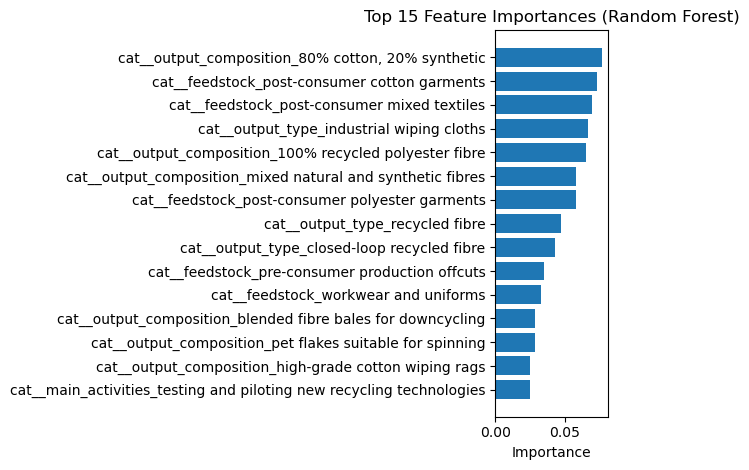

In [238]:
plot_top_features(fi, 15, FIG_DIR / "rf_feature_importance_top15.png")
fi.to_csv(TABLE_DIR / "rf_feature_importance.csv", index=False)


In [240]:
from sklearn.model_selection import cross_val_score

# R2 across folds
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_mae = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")

print("CV R2 mean:", cv_r2.mean().round(3), "std:", cv_r2.std().round(3))
print("CV MAE mean:", cv_mae.mean().round(3), "std:", cv_mae.std().round(3))


CV R2 mean: -39.581 std: 31.674
CV MAE mean: 384.676 std: 204.62


In [241]:
cv_summary = pd.DataFrame({
    "metric": ["r2", "mae"],
    "mean": [cv_r2.mean(), cv_mae.mean()],
    "std": [cv_r2.std(), cv_mae.std()],
})
cv_summary.to_csv(TABLE_DIR / "rf_cv_summary.csv", index=False)
cv_summary


,metric,mean,std
0,r2,-39.580553,31.673924
1,mae,384.676497,204.619907


In [244]:
import joblib

model.fit(X_train, y_train)
joblib.dump(model, MODELS_DIR / "rf_capacity_model.joblib")


['C:\\Users\\Admin\\Desktop\\textile_circularity_project\\models\\rf_capacity_model.joblib']

In [248]:
model = joblib.load(MODELS_DIR / "rf_capacity_model.joblib")


In [250]:
from datetime import datetime
import json

run_log = {
    "timestamp": datetime.now().isoformat(timespec="seconds"),
    "target": target,
    "n_rows": int(df_ml.shape[0]),
    "n_features": int(X.shape[1]),
    "r2": float(r2),
    "mae": float(mae),
    "rmse": float(rmse),
    "random_state": RANDOM_STATE,
    "model_params": model.named_steps["rf"].get_params()
}

with open(OUTPUTS_DIR / "run_log.json", "w") as f:
    json.dump(run_log, f, indent=2)

run_log


{'timestamp': '2026-01-04T22:44:54',
 'target': 'current_capacity',
 'n_rows': 80,
 'n_features': 8,
 'r2': -0.5178972540150852,
 'mae': 356.9456051336445,
 'rmse': 412.01344997116195,
 'random_state': 42,
 'model_params': {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'n_estimators': 400,
  'n_jobs': -1,
  'oob_score': False,
  'random_state': 42,
  'verbose': 0,
  'warm_start': False}}

In [252]:
assert df_ml["current_capacity"].min() >= 0, "Capacity has negative values — check cleaning."
assert df_ml["current_capacity"].isna().sum() == 0, "Target has missing values — check dropna."
print("Sanity checks passed ✅")


Sanity checks passed ✅


In [254]:
from pathlib import Path
import pandas as pd
import numpy as np

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

BASE_DIR = Path(r"C:\Users\Admin\Desktop\textile_circularity_project")
DATA_DIR = BASE_DIR / "data"
PROCESSED_DIR = DATA_DIR / "processed"
OUTPUTS_DIR = BASE_DIR / "outputs"
FIG_DIR = OUTPUTS_DIR / "figures"
TABLE_DIR = OUTPUTS_DIR / "tables"
MODELS_DIR = BASE_DIR / "models"

for p in [PROCESSED_DIR, FIG_DIR, TABLE_DIR, MODELS_DIR]:
    p.mkdir(parents=True, exist_ok=True)

WRAP_PATH = Path(r"C:\Users\Admin\Desktop\wrap_textiles_model_inputs.csv")


In [256]:
df_raw = pd.read_csv(WRAP_PATH, encoding="latin1")

df_raw.columns = df_raw.columns.str.strip().str.lower().str.replace(" ", "_")
df_raw = df_raw.drop(columns=[c for c in df_raw.columns if "unnamed" in c], errors="ignore")

print("Shape:", df_raw.shape)
df_raw.head()


Shape: (80, 20)


,organisation,country,region,main_facility_address,secondary_facility,core_function,main_activities,commercial/sclaed,piloting,research\lab,intereseted_in,current_capacity,2025_capacity,2030_capacity,feedstock,output_type,output_composition,certification,original_source,date_last_updated
0,All - Tex Recyclers Ltd,United Kingdom,UK,"10 Circular Way, City 1","Satellite Facility 1, Industrial Zone",Sorting & grading,Door-to-door textile collection,Yes,Yes,No,Textile-to-textile recycling; circular busines...,500,600,750,Post-consumer mixed textiles,Reused clothing,"80% cotton, 20% synthetic",ISO 14001,Synthetic dataset based on WRAP structure (not...,2025-12-25
1,Antur Waunfawr/ Warws Werdd,Germany,Europe,"11 Circular Way, City 2",NaN,Reuse & resale,Bring-bank collection and sorting,Yes,No,No,Textile-to-textile recycling; circular busines...,515,618,772,Post-consumer cotton garments,Recycled fibre,100% recycled polyester fibre,GRS (Global Recycled Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25
2,ARETEX,France,Europe,"12 Circular Way, City 3",NaN,Mechanical recycling,Sorting by fibre composition and colour,Yes,No,Yes,Textile-to-textile recycling; circular busines...,530,636,795,Post-consumer polyester garments,Industrial wiping cloths,Mixed natural and synthetic fibres,RCS (Recycled Claim Standard),Synthetic dataset based on WRAP structure (not...,2025-12-25
3,Around Systems,Netherlands,Europe,"13 Circular Way, City 4",NaN,Chemical recycling,Export of reusable clothing,Yes,No,Yes,Textile-to-textile recycling; circular busines...,545,654,817,Pre-consumer production offcuts,Insulation material,High-grade cotton wiping rags,ISO 9001,Synthetic dataset based on WRAP structure (not...,2025-12-25
4,Atelier Riforma,Belgium,Europe,"14 Circular Way, City 5","Satellite Facility 5, Industrial Zone",Collection & logistics,Shredding and fibre recovery,Yes,No,No,Textile-to-textile recycling; circular busines...,560,672,840,Hotel and hospital linens,Polymer flakes,PET flakes suitable for spinning,NaN,Synthetic dataset based on WRAP structure (not...,2025-12-25


In [258]:
audit = pd.DataFrame({
    "dtype": df_raw.dtypes.astype(str),
    "missing": df_raw.isna().sum(),
    "missing_%": (df_raw.isna().mean()*100).round(2),
    "n_unique": df_raw.nunique(dropna=True)
}).sort_values("missing", ascending=False)

audit.to_csv(TABLE_DIR / "data_audit_raw.csv")
audit.head(20)


,dtype,missing,missing_%,n_unique
secondary_facility,object,60,75.0,20
certification,object,16,20.0,4
organisation,object,0,0.0,80
current_capacity,int64,0,0.0,80
original_source,object,0,0.0,1
output_composition,object,0,0.0,6
output_type,object,0,0.0,7
feedstock,object,0,0.0,6
2030_capacity,int64,0,0.0,80
2025_capacity,int64,0,0.0,80


In [260]:
def clean_wrap(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # numeric conversion
    for col in ["current_capacity", "2025_capacity", "2030_capacity"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # standardise text
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

    # drop rows missing target
    df = df.dropna(subset=["current_capacity"])

    # remove duplicates
    df = df.drop_duplicates()

    # basic sanity
    df = df[df["current_capacity"] >= 0]

    return df

df = clean_wrap(df_raw)
df.to_csv(PROCESSED_DIR / "wrap_clean.csv", index=False)

print("Clean shape:", df.shape)
df.head()


Clean shape: (80, 20)


,organisation,country,region,main_facility_address,secondary_facility,core_function,main_activities,commercial/sclaed,piloting,research\lab,intereseted_in,current_capacity,2025_capacity,2030_capacity,feedstock,output_type,output_composition,certification,original_source,date_last_updated
0,all - tex recyclers ltd,united kingdom,uk,"10 circular way, city 1","satellite facility 1, industrial zone",sorting & grading,door-to-door textile collection,yes,yes,no,textile-to-textile recycling; circular busines...,500,600,750,post-consumer mixed textiles,reused clothing,"80% cotton, 20% synthetic",iso 14001,synthetic dataset based on wrap structure (not...,2025-12-25
1,antur waunfawr/ warws werdd,germany,europe,"11 circular way, city 2",nan,reuse & resale,bring-bank collection and sorting,yes,no,no,textile-to-textile recycling; circular busines...,515,618,772,post-consumer cotton garments,recycled fibre,100% recycled polyester fibre,grs (global recycled standard),synthetic dataset based on wrap structure (not...,2025-12-25
2,aretex,france,europe,"12 circular way, city 3",nan,mechanical recycling,sorting by fibre composition and colour,yes,no,yes,textile-to-textile recycling; circular busines...,530,636,795,post-consumer polyester garments,industrial wiping cloths,mixed natural and synthetic fibres,rcs (recycled claim standard),synthetic dataset based on wrap structure (not...,2025-12-25
3,around systems,netherlands,europe,"13 circular way, city 4",nan,chemical recycling,export of reusable clothing,yes,no,yes,textile-to-textile recycling; circular busines...,545,654,817,pre-consumer production offcuts,insulation material,high-grade cotton wiping rags,iso 9001,synthetic dataset based on wrap structure (not...,2025-12-25
4,atelier riforma,belgium,europe,"14 circular way, city 5","satellite facility 5, industrial zone",collection & logistics,shredding and fibre recovery,yes,no,no,textile-to-textile recycling; circular busines...,560,672,840,hotel and hospital linens,polymer flakes,pet flakes suitable for spinning,nan,synthetic dataset based on wrap structure (not...,2025-12-25


In [262]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

target = "current_capacity"

features = [
    "country","region","core_function","main_activities","feedstock",
    "output_type","output_composition","commercialsclaed","piloting","researchlab"
]
features = [f for f in features if f in df.columns]

X = df[features]
y = df[target]

cat_cols = X.select_dtypes(include="object").columns.tolist()
num_cols = X.select_dtypes(exclude="object").columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE
)

pre = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", "passthrough", num_cols),
    ]
)

rf = RandomForestRegressor(
    n_estimators=400,
    min_samples_leaf=5,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

model = Pipeline([("preprocessor", pre), ("rf", rf)])
model


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'region',
                                                   'core_function',
                                                   'main_activities',
                                                   'feedstock', 'output_type',
                                                   'output_composition',
                                                   'piloting']),
                                                 ('num', 'passthrough', [])])),
                ('rf',
                 RandomForestRegressor(min_samples_leaf=5, n_estimators=400,
                                       n_jobs=-1, random_state=42))])

In [264]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)

results = pd.DataFrame([{"r2": r2, "mae": mae, "rmse": rmse}])
results.to_csv(TABLE_DIR / "rf_test_metrics.csv", index=False)
results


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,r2,mae,rmse
0,-0.517897,356.945605,412.01345


In [266]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_mae = -cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")

cv_summary = pd.DataFrame([
    {"metric":"r2", "mean":cv_r2.mean(), "std":cv_r2.std()},
    {"metric":"mae", "mean":cv_mae.mean(), "std":cv_mae.std()},
])

cv_summary.to_csv(TABLE_DIR / "rf_cv_summary.csv", index=False)
cv_summary


,metric,mean,std
0,r2,-39.580553,31.673924
1,mae,384.676497,204.619907


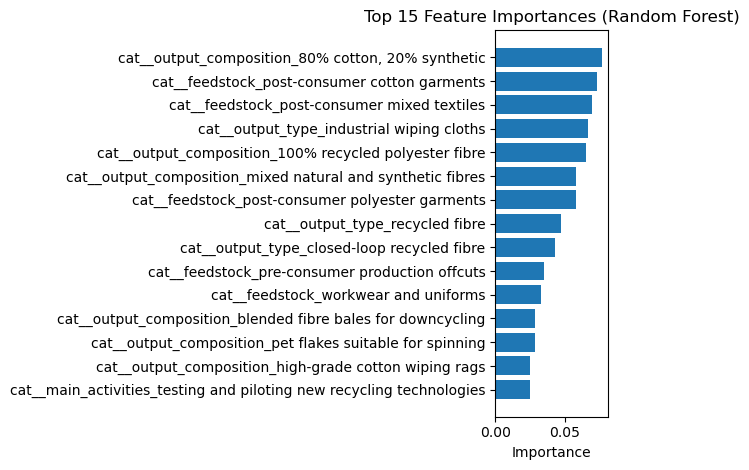

,feature,importance
48,"cat__output_composition_80% cotton, 20% synthetic",0.076664
35,cat__feedstock_post-consumer cotton garments,0.072800
36,cat__feedstock_post-consumer mixed textiles,0.069272
41,cat__output_type_industrial wiping cloths,0.066351
47,cat__output_composition_100% recycled polyeste...,0.065382
51,cat__output_composition_mixed natural and synt...,0.057570
37,cat__feedstock_post-consumer polyester garments,0.057566
45,cat__output_type_recycled fibre,0.046856
40,cat__output_type_closed-loop recycled fibre,0.042900
38,cat__feedstock_pre-consumer production offcuts,0.034758


In [267]:
import matplotlib.pyplot as plt

feat_names = model.named_steps["preprocessor"].get_feature_names_out()
imps = model.named_steps["rf"].feature_importances_

fi = pd.DataFrame({"feature": feat_names, "importance": imps}).sort_values("importance", ascending=False)
fi.to_csv(TABLE_DIR / "rf_feature_importance.csv", index=False)

top = fi.head(15).iloc[::-1]
plt.figure()
plt.barh(top["feature"], top["importance"])
plt.xlabel("Importance")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig(FIG_DIR / "rf_feature_importance_top15.png", dpi=200)
plt.show()

fi.head(15)


In [270]:
import joblib
joblib.dump(model, MODELS_DIR / "rf_capacity_model.joblib")


['C:\\Users\\Admin\\Desktop\\textile_circularity_project\\models\\rf_capacity_model.joblib']

In [272]:
# What if all organisations had researchlab = 'yes'? (only if column exists)
if "researchlab" in X.columns:
    X_scn = X.copy()
    X_scn["researchlab"] = "yes"
    pred_scn = model.predict(X_scn)

    scn = pd.DataFrame({
        "baseline_pred": model.predict(X),
        "scenario_pred": pred_scn
    })
    scn["delta"] = scn["scenario_pred"] - scn["baseline_pred"]

    scn.describe().to_csv(TABLE_DIR / "scenario_researchlab_yes_summary.csv")
    scn.describe()


In [274]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def savefig(name):
    plt.tight_layout()
    plt.savefig(FIG_DIR / name, dpi=200)
    plt.show()


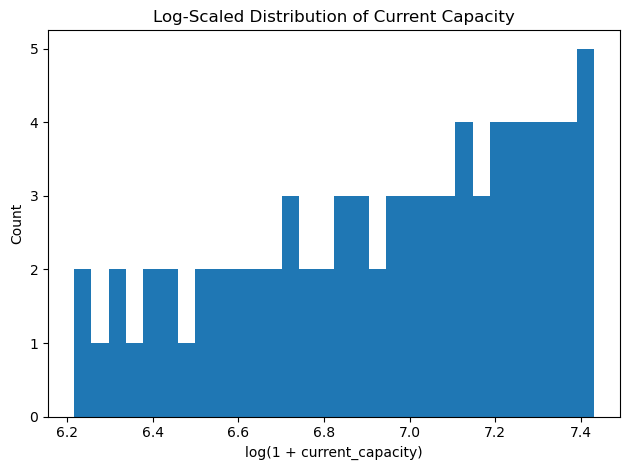

In [276]:
plt.figure()
plt.hist(np.log1p(df["current_capacity"].dropna()), bins=30)
plt.xlabel("log(1 + current_capacity)")
plt.ylabel("Count")
plt.title("Log-Scaled Distribution of Current Capacity")
savefig("02_capacity_distribution_log.png")


<Figure size 640x480 with 0 Axes>

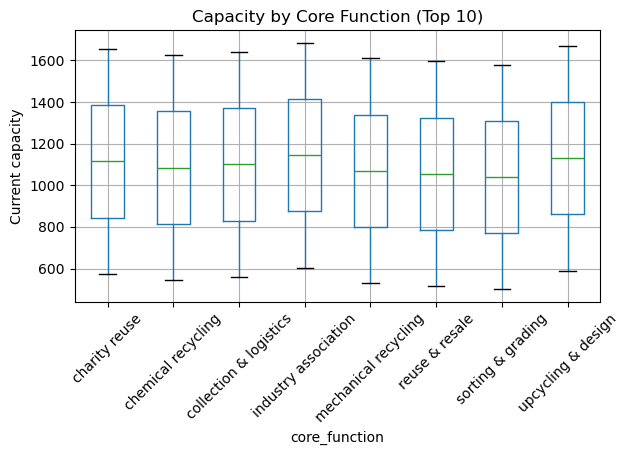

In [278]:
top_funcs = df["core_function"].value_counts().head(10).index
d = df[df["core_function"].isin(top_funcs)]

plt.figure()
d.boxplot(column="current_capacity", by="core_function", rot=45)
plt.title("Capacity by Core Function (Top 10)")
plt.suptitle("")
plt.ylabel("Current capacity")
savefig("03_capacity_by_core_function_boxplot.png")


<Figure size 640x480 with 0 Axes>

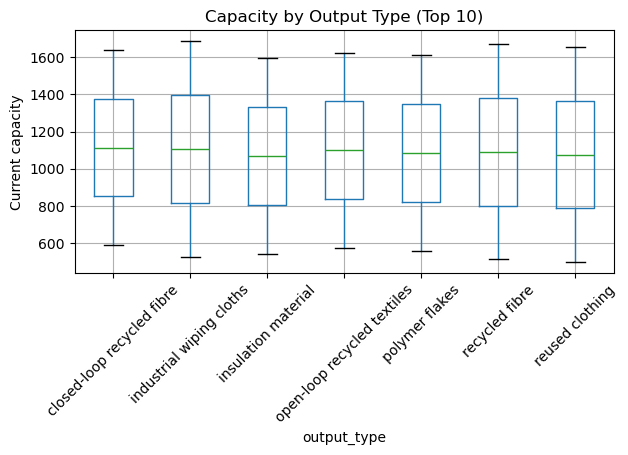

In [280]:
top_out = df["output_type"].value_counts().head(10).index
d = df[df["output_type"].isin(top_out)]

plt.figure()
d.boxplot(column="current_capacity", by="output_type", rot=45)
plt.title("Capacity by Output Type (Top 10)")
plt.suptitle("")
plt.ylabel("Current capacity")
savefig("04_capacity_by_output_type_boxplot.png")


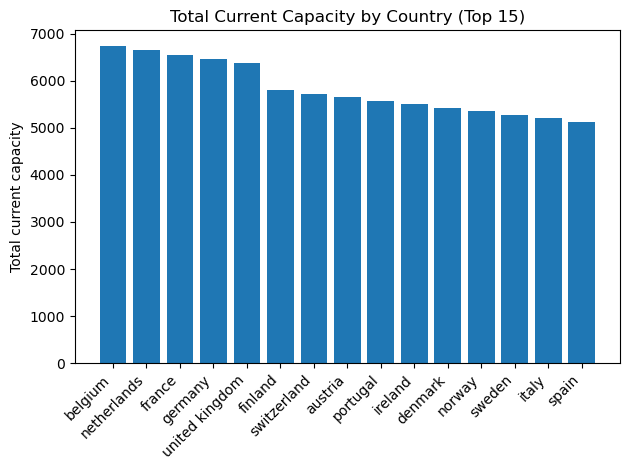

In [282]:
# Country totals (top 15)
country_totals = df.groupby("country")["current_capacity"].sum().sort_values(ascending=False).head(15)

plt.figure()
plt.bar(country_totals.index.astype(str), country_totals.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Total current capacity")
plt.title("Total Current Capacity by Country (Top 15)")
savefig("05_total_capacity_by_country_top15.png")


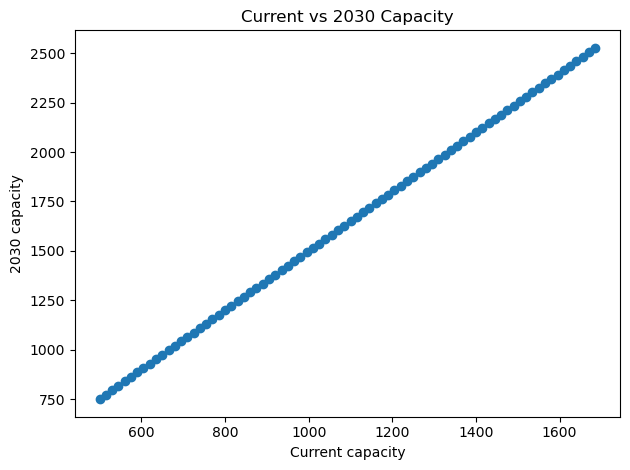

In [284]:
if "2030_capacity" in df.columns:
    d = df.dropna(subset=["current_capacity","2030_capacity"]).copy()

    plt.figure()
    plt.scatter(d["current_capacity"], d["2030_capacity"])
    plt.xlabel("Current capacity")
    plt.ylabel("2030 capacity")
    plt.title("Current vs 2030 Capacity")
    savefig("06_current_vs_2030_scatter.png")


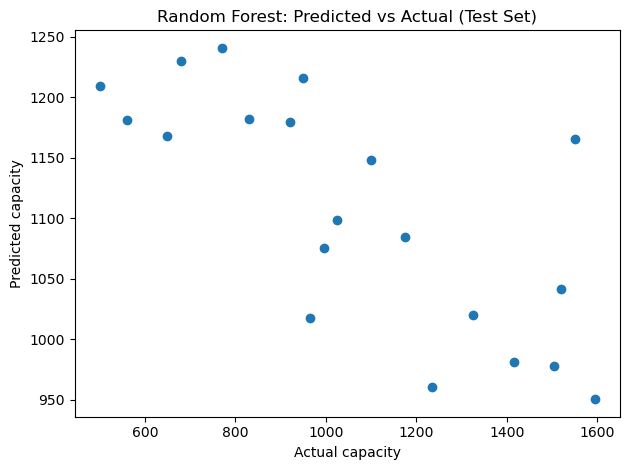

In [288]:
plt.figure()
plt.scatter(y_test, pred)
plt.xlabel("Actual capacity")
plt.ylabel("Predicted capacity")
plt.title("Random Forest: Predicted vs Actual (Test Set)")
savefig("08_predicted_vs_actual.png")


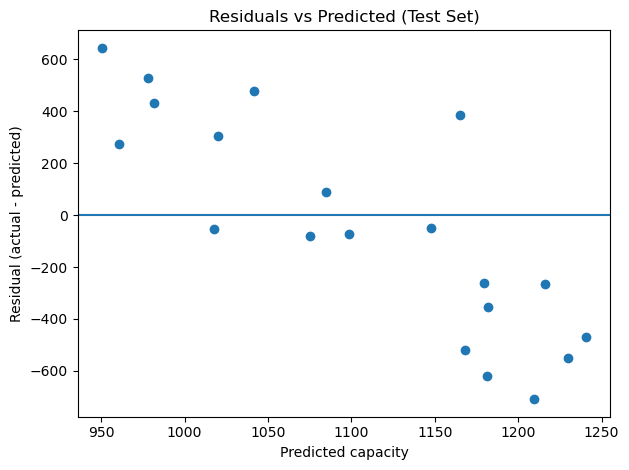

In [290]:
resid = y_test - pred
plt.figure()
plt.scatter(pred, resid)
plt.axhline(0)
plt.xlabel("Predicted capacity")
plt.ylabel("Residual (actual - predicted)")
plt.title("Residuals vs Predicted (Test Set)")
savefig("09_residuals_vs_predicted.png")


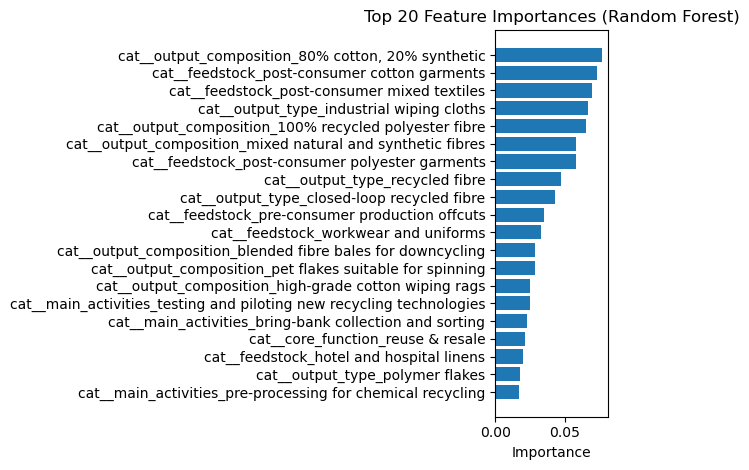

In [292]:
top = fi.head(20).iloc[::-1]
plt.figure()
plt.barh(top["feature"], top["importance"])
plt.xlabel("Importance")
plt.title("Top 20 Feature Importances (Random Forest)")
savefig("11_feature_importance_top20.png")


In [296]:
# Example if you include 2025_capacity as a feature
# Make sure your X includes it first.

if len(num_feats) > 0:
    plt.figure()
    PartialDependenceDisplay.from_estimator(model, X, [num_feats[0]])
    plt.title(f"Partial Dependence: {num_feats[0]}")
    savefig(f"12_pdp_{num_feats[0]}.png")


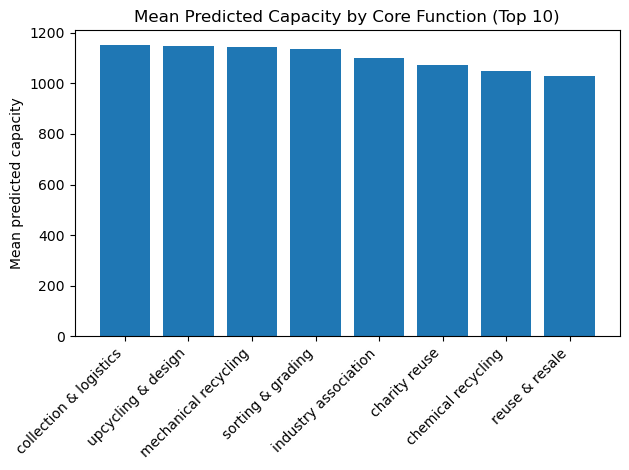

In [298]:
# Predicted capacity for all rows
pred_all = model.predict(X)
df_plot = df.copy()
df_plot["pred_capacity"] = pred_all

top_funcs = df_plot["core_function"].value_counts().head(10).index
g = df_plot[df_plot["core_function"].isin(top_funcs)].groupby("core_function")["pred_capacity"].mean().sort_values(ascending=False)

plt.figure()
plt.bar(g.index.astype(str), g.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean predicted capacity")
plt.title("Mean Predicted Capacity by Core Function (Top 10)")
savefig("13_mean_pred_capacity_by_core_function.png")


In [302]:
if "researchlab" in X.columns:
    X_scn = X.copy()
    X_scn["researchlab"] = "yes"

    base = model.predict(X)
    scn = model.predict(X_scn)

    plt.figure()
    plt.hist(base, bins=30, alpha=0.7, label="Baseline")
    plt.hist(scn, bins=30, alpha=0.7, label="Scenario: researchlab=yes")
    plt.xlabel("Predicted capacity")
    plt.ylabel("Count")
    plt.title("Scenario Shift in Predicted Capacity")
    plt.legend()
    savefig("15_scenario_researchlab_shift.png")


In [304]:
import os

os.getcwd()


'C:\\Users\\Admin'

In [306]:
from pathlib import Path

HOME = Path.cwd()

DATASETS_DIR = HOME / "datasets"
FIGURES_DIR = HOME / "figures"
TABLES_DIR = HOME / "tables"
MODELS_DIR = HOME / "models"

for p in [DATASETS_DIR, FIGURES_DIR, TABLES_DIR, MODELS_DIR]:
    p.mkdir(exist_ok=True)

DATASETS_DIR


WindowsPath('C:/Users/Admin/datasets')

In [308]:
df.to_csv(DATASETS_DIR / "wrap_clean_infrastructure.csv", index=False)


In [310]:
df_raw.to_csv(DATASETS_DIR / "wrap_raw_backup.csv", index=False)
df_ml.to_csv(DATASETS_DIR / "wrap_ml_ready.csv", index=False)


In [312]:
fi.to_csv(TABLES_DIR / "rf_feature_importance.csv", index=False)


In [314]:
results.to_csv(TABLES_DIR / "rf_test_metrics.csv", index=False)
cv_summary.to_csv(TABLES_DIR / "rf_cv_summary.csv", index=False)


In [316]:
import matplotlib.pyplot as plt

def savefig(name):
    plt.tight_layout()
    plt.savefig(FIGURES_DIR / name, dpi=200)
    plt.show()


In [318]:
import joblib

joblib.dump(model, MODELS_DIR / "rf_capacity_model.joblib")


['C:\\Users\\Admin\\models\\rf_capacity_model.joblib']

In [320]:
import pandas as pd
from pathlib import Path
import joblib

HOME = Path.cwd()

df = pd.read_csv(HOME / "datasets" / "wrap_clean_infrastructure.csv")
model = joblib.load(HOME / "models" / "rf_capacity_model.joblib")


In [1]:
import os
os.getcwd()


'C:\\Users\\Admin'

In [5]:
import os

found = []
for root, dirs, files in os.walk(r"C:\Users\Admin"):
    for f in files:
        if f.lower() == "wrap_textiles_model_inputs.csv":
            found.append(os.path.join(root, f))

found


['C:\\Users\\Admin\\Desktop\\wrap_textiles_model_inputs.csv']

In [7]:
import shutil
from pathlib import Path

src = found[0]                 # the real location
dst = Path.cwd() / "wrap_textiles_model_inputs.csv"  # Jupyter Home

shutil.copy(src, dst)

dst


WindowsPath('C:/Users/Admin/wrap_textiles_model_inputs.csv')

In [9]:
import os
os.getcwd()


'C:\\Users\\Admin'

In [11]:
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.ms-ad',
 '.streamlit',
 '.vscode',
 '3D Objects',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'datasets',
 'Desktop',
 'dissertation.ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'figures',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'models',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'tables',
 'Templates',
 'textiles_dashboard.ipynb',
 'Untitled.ipynb',
 'Untitled

In [13]:
from pathlib import Path

project = Path(r"C:\Users\Admin\Desktop\textile_circularity_project")
project.exists(), list(project.iterdir())


(True,
 [WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/data'),
  WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/models'),
  WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/outputs')])

In [15]:
files = sorted([
    p for p in project.rglob("*")
    if p.suffix.lower() in [".csv", ".xlsx"]
])

files


[WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/data/processed/wrap_clean.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/data/processed/wrap_expanded_clean.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/data/processed/wrap_operational_model_data.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/outputs/tables/data_audit.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/outputs/tables/data_audit_raw.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/outputs/tables/rf_cv_summary.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/outputs/tables/rf_feature_importance.csv'),
 WindowsPath('C:/Users/Admin/Desktop/textile_circularity_project/outputs/tables/rf_test_metrics.csv')]

In [21]:
df2 = pd.read_csv(files[0], encoding="latin1")  # change index if needed
df2.head()


,organisation,country,region,main_facility_address,secondary_facility,core_function,main_activities,commercial/sclaed,piloting,research\lab,intereseted_in,current_capacity,2025_capacity,2030_capacity,feedstock,output_type,output_composition,certification,original_source,date_last_updated
0,all - tex recyclers ltd,united kingdom,uk,"10 circular way, city 1","satellite facility 1, industrial zone",sorting & grading,door-to-door textile collection,yes,yes,no,textile-to-textile recycling; circular busines...,500,600,750,post-consumer mixed textiles,reused clothing,"80% cotton, 20% synthetic",iso 14001,synthetic dataset based on wrap structure (not...,2025-12-25
1,antur waunfawr/ warws werdd,germany,europe,"11 circular way, city 2",NaN,reuse & resale,bring-bank collection and sorting,yes,no,no,textile-to-textile recycling; circular busines...,515,618,772,post-consumer cotton garments,recycled fibre,100% recycled polyester fibre,grs (global recycled standard),synthetic dataset based on wrap structure (not...,2025-12-25
2,aretex,france,europe,"12 circular way, city 3",NaN,mechanical recycling,sorting by fibre composition and colour,yes,no,yes,textile-to-textile recycling; circular busines...,530,636,795,post-consumer polyester garments,industrial wiping cloths,mixed natural and synthetic fibres,rcs (recycled claim standard),synthetic dataset based on wrap structure (not...,2025-12-25
3,around systems,netherlands,europe,"13 circular way, city 4",NaN,chemical recycling,export of reusable clothing,yes,no,yes,textile-to-textile recycling; circular busines...,545,654,817,pre-consumer production offcuts,insulation material,high-grade cotton wiping rags,iso 9001,synthetic dataset based on wrap structure (not...,2025-12-25
4,atelier riforma,belgium,europe,"14 circular way, city 5","satellite facility 5, industrial zone",collection & logistics,shredding and fibre recovery,yes,no,no,textile-to-textile recycling; circular busines...,560,672,840,hotel and hospital linens,polymer flakes,pet flakes suitable for spinning,NaN,synthetic dataset based on wrap structure (not...,2025-12-25


In [19]:
import pandas as pd


In [ ]:
df2 = pd.read_csv(files[0], encoding="latin1")
df2.head()


In [23]:
from shutil import copy2
from pathlib import Path

src = files[0]              # choose the correct one
dst = Path.cwd() / src.name

copy2(src, dst)
dst


WindowsPath('C:/Users/Admin/wrap_clean.csv')